In [1]:
import numpy as np
import pandas as pd
#inline backened to generate the plots within the browser
%matplotlib inline
import matplotlib.pyplot as plt

## 1. Survey Dataset &  BarGraphs

In [2]:
df = pd.read_csv('Topic_Survey_Assignment.csv')

In [3]:
df.shape

(6, 4)

In [4]:
df.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


##### Sorting the values of VeryInterested columns in descending order

In [5]:
df.sort_values(['Very interested'] ,ascending=False , axis=0,inplace=True)

In [6]:
df.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
1,Data Analysis / Statistics,1688,444,60
5,Machine Learning,1629,477,74
3,Data Visualization,1340,734,102
0,Big Data (Spark / Hadoop),1332,729,127
4,Deep Learning,1263,770,136


##### Percentages of the columns


In [7]:
#Total respondents=2233

df['%Very interested'] = (df['Very interested']/2233)*100
df['%Somewhat interested'] = (df['Somewhat interested']/2233)*100
df['%Not interested'] = (df['Not interested']/2233)*100

In [8]:
df.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested,%Very interested,%Somewhat interested,%Not interested
1,Data Analysis / Statistics,1688,444,60,75.593372,19.883565,2.686968
5,Machine Learning,1629,477,74,72.951187,21.361397,3.313927
3,Data Visualization,1340,734,102,60.008957,32.870578,4.567846
0,Big Data (Spark / Hadoop),1332,729,127,59.650694,32.646664,5.687416
4,Deep Learning,1263,770,136,56.560681,34.482759,6.090461


In [9]:
#Dropping the unnecessary columns
df.drop(columns=['Very interested' ,'Somewhat interested', 'Not interested' ] , inplace=True)

In [10]:
df.head()

,Unnamed: 0,%Very interested,%Somewhat interested,%Not interested
1,Data Analysis / Statistics,75.593372,19.883565,2.686968
5,Machine Learning,72.951187,21.361397,3.313927
3,Data Visualization,60.008957,32.870578,4.567846
0,Big Data (Spark / Hadoop),59.650694,32.646664,5.687416
4,Deep Learning,56.560681,34.482759,6.090461


##### Use the artist layer of Matplotlib to replicate the bar chart

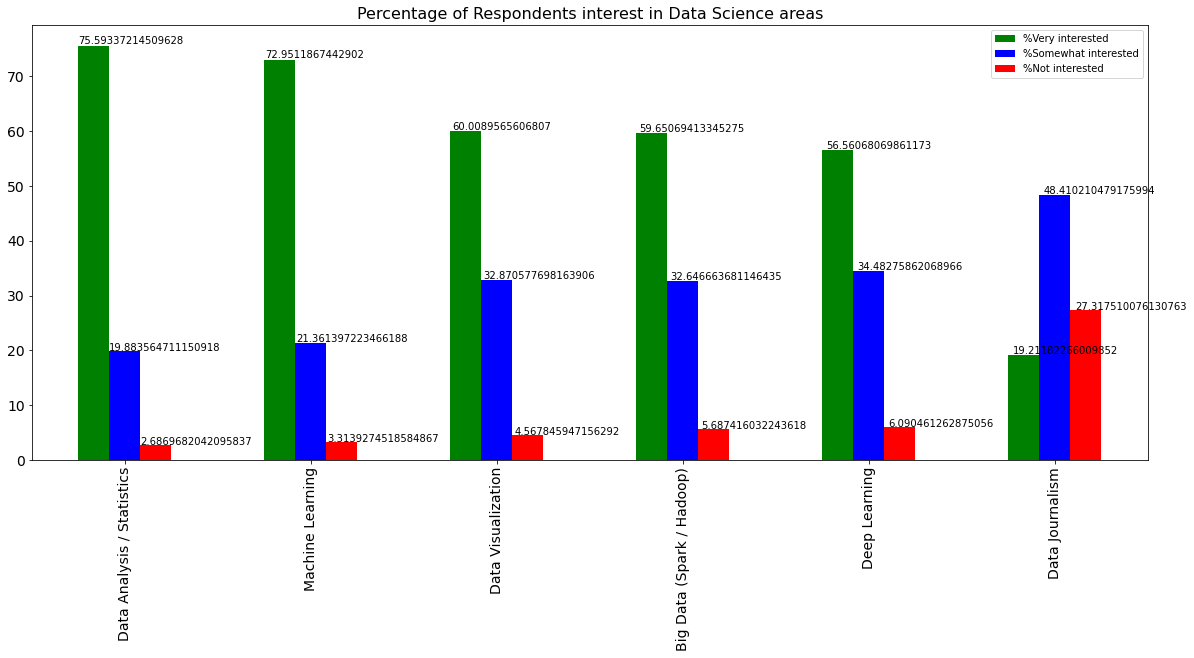

In [43]:
ax = df.plot(kind='bar' , figsize=(20,8) , lw=0.8, fontsize=14 ,color=['Green' , 'Blue' , 'Red'])
ax.set_title('Percentage of Respondents interest in Data Science areas',fontsize=16 )
#Annotate row
x_labels=df['Unnamed: 0'].unique()
ax.set_xticklabels(x_labels)

for p in ax.patches:

    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
ax.legend()

## 2.Second Datasets 

In [44]:
df1 = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [45]:
df1.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [47]:
df1.shape

(150500, 13)

In [48]:
df1.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [53]:
df1.rename(columns={'PdDistrict':'Neighborhood'},inplace=True)

In [59]:
df2=df1['Neighborhood'].value_counts()

In [62]:
df2

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: Neighborhood, dtype: int64

In [74]:
df2.to_frame('Count')

,Count
SOUTHERN,28445
NORTHERN,20100
MISSION,19503
CENTRAL,17666
BAYVIEW,14303
INGLESIDE,11594
TARAVAL,11325
TENDERLOIN,9942
RICHMOND,8922
PARK,8699
